In [3]:
import pandas as pd

In [5]:
#load the model we want to analyze (top15 is our best result)
df = pd.read_csv('results/dynamic/t99/DE_top_15.csv')

In [6]:
df_1 = df[df['ttm']==1]
df_2 = df[df['ttm']==2]
df_3 = df[df['ttm']==3]

In [7]:
df_3 = df_3[df_3['undetected_failure_ids'].apply(lambda x: x != '[]')]
df_3 = df_3[['simulation_name', 'threshold','undetected_failure_ids']]

In [8]:
# Convert the strings representing lists to actual lists
df_3['undetected_failure_ids'] = df_3['undetected_failure_ids'].apply(eval)

# Create a new DataFrame with each failure in a separate row
new_rows = []
for index, row in df_3.iterrows():
    simulation = row['simulation_name']
    failures = row['undetected_failure_ids']
    threshold = row['threshold']
    for failure in failures:
        new_row = {'simulation_name': simulation, 'threshold': threshold ,'undetected_failure_id': failure}
        new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_failures_3 = pd.DataFrame(new_rows)

In [9]:
df_failures_3

,simulation_name,threshold,undetected_failure_id
0,mutants\udacity_add_weights_regularisation_mut...,0.001173,351
1,mutants\udacity_change_activation_function_mut...,0.001173,314
2,mutants\udacity_change_activation_function_mut...,0.001173,593
3,mutants\udacity_change_activation_function_mut...,0.001173,829
4,mutants\udacity_change_activation_function_mut...,0.001173,1061
5,mutants\udacity_change_activation_function_mut...,0.001173,1283
6,mutants\udacity_change_activation_function_mut...,0.001173,336
7,mutants\udacity_change_activation_function_mut...,0.001173,500
8,mutants\udacity_change_dropout_rate_mutated0_M...,0.001173,548
9,mutants\udacity_change_dropout_rate_mutated0_M...,0.001173,951


Create a small video of each failure that was not detected. We first save the images in a folder and then create a mp4 file.

In [112]:
import pandas as pd
import shutil
import os

root_path = 'simulations/'

# Create a new folder for qualitative analysis
qualitative_analysis_path = 'qualitative_analysis'
os.makedirs(qualitative_analysis_path, exist_ok=True)

# Iterate through each failure in the DataFrame
for index, row in df_failures_3.iterrows():
    simulation_name = row['simulation_name']
    failure_id = row['undetected_failure_id']

    # Path to the driving log file
    driving_log_path = os.path.join(root_path, simulation_name, 'driving_log.csv')

    # Read the driving log file
    driving_log = pd.read_csv(driving_log_path)

    for i in range(0, 121):
        # Get the image path from the 'center' column
        failure_row = driving_log[driving_log['frameId'] == failure_id-i]
        image_path = failure_row['center'].values[0]

        # Extract the relative path starting from 'IMG/'
        img_relative_path = image_path.split(r'IMG')[1]

        # Create a subfolder for each failure in the qualitative analysis folder
        failure_folder_path = os.path.join(qualitative_analysis_path, str(index+1))
        os.makedirs(failure_folder_path, exist_ok=True)

        path = 'simulations/'+simulation_name+'/IMG'+img_relative_path
        # Copy the image corresponding to the failure_id to the subfolder
        if os.path.isfile(path):
            shutil.copy(path, failure_folder_path)


In [114]:
import cv2
import os

def create_video_from_images(input_folder, output_video_path, frame_rate=30):
    image_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.jpg')])

    if not image_files:
        print("No image files found in the folder.")
        return

    # Assuming all images have the same dimensions
    first_image_path = os.path.join(input_folder, image_files[0])
    first_image = cv2.imread(first_image_path)
    height, width, _ = first_image.shape

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

    # Write each frame to the video
    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)
        frame = cv2.imread(image_path)
        out.write(frame)

    # Release the VideoWriter object
    out.release()


In [115]:
for i in range(20):
    input_folder = 'qualitative_analysis/'+str(i+1)
    output_video_path = 'qualitative_analysis/'+str(i+1)+'_output_video.mp4'
    create_video_from_images(input_folder, output_video_path)

Show the conditions in which the failures occur

In [11]:
import pandas as pd

df_ranges = pd.DataFrame(columns=['Simulation', 'Failure'])

# Iterate through unique simulation names
for simulation_name in df_failures_3['simulation_name'].unique():
    # Filter rows for the current simulation
    simulation_rows = df_failures_3[df_failures_3['simulation_name'] == simulation_name]

    # Get the row indexes as a range
    index_range = f"{simulation_rows.index.min()+1} - {simulation_rows.index.max()+1}"

    # Append the data to the new DataFrame
    df_ranges = df_ranges.append({'Simulation': simulation_name, 'Failure': index_range}, ignore_index=True)



In [12]:
# Set the display options to show more rows and columns
pd.set_option('display.max_colwidth', None)
df_ranges

,Simulation,Failure
0,mutants\udacity_add_weights_regularisation_mutated0_MP_l1_l2_3_2,1 - 1
1,mutants\udacity_change_activation_function_mutated0_MP_relu_4_2,2 - 6
2,mutants\udacity_change_activation_function_mutated0_MP_softsign_4_5,7 - 7
3,mutants\udacity_change_activation_function_mutated0_MP_tanh_4_2,8 - 8
4,mutants\udacity_change_dropout_rate_mutated0_MP_0.75_0.75_6_0,9 - 10
5,mutants\udacity_change_dropout_rate_mutated0_MP_0.125_0.125_6_2,11 - 12
6,mutants\udacity_change_label_mutated0_MP_12.5_4,13 - 13
7,ood\xai-track1-rain-40,14 - 14
8,ood\xai-track1-rain-90,15 - 15
9,ood\xai-track1-snow-10,16 - 16


Create plots for each condition with threshold and failures not detected.

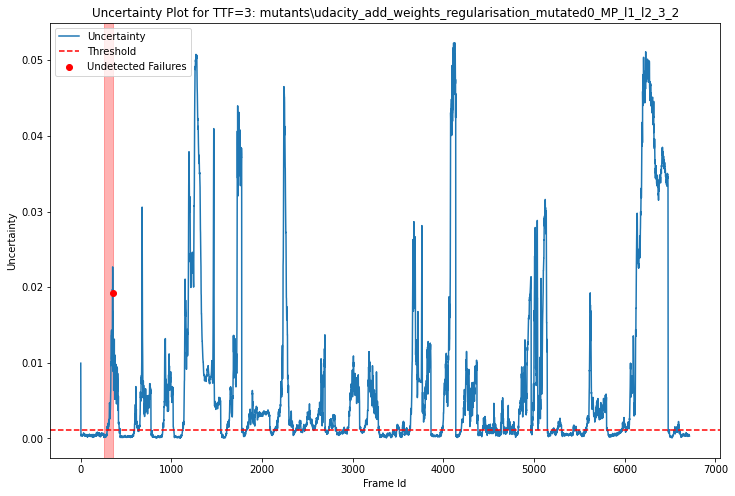

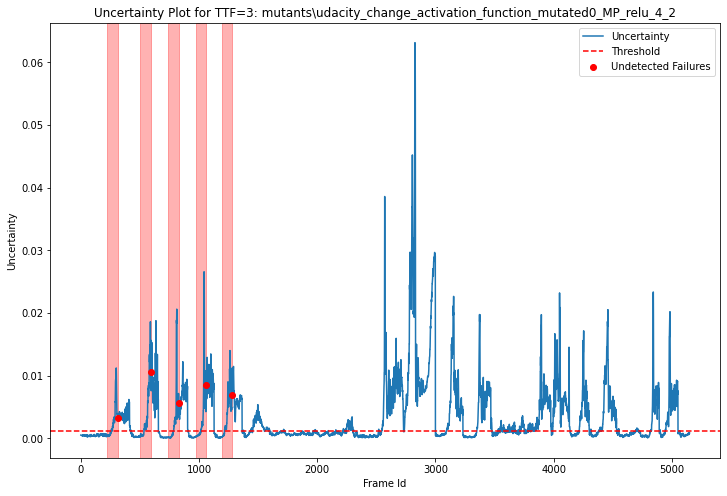

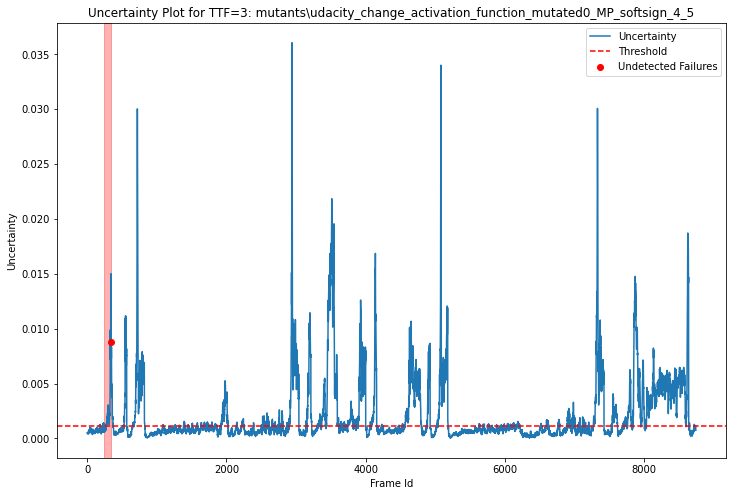

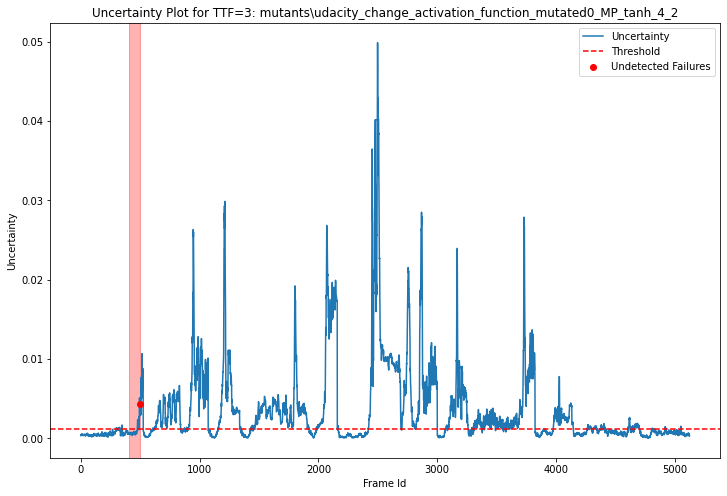

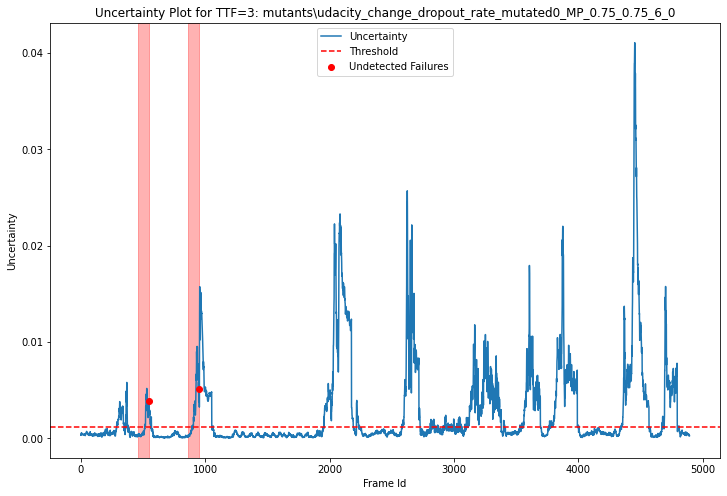

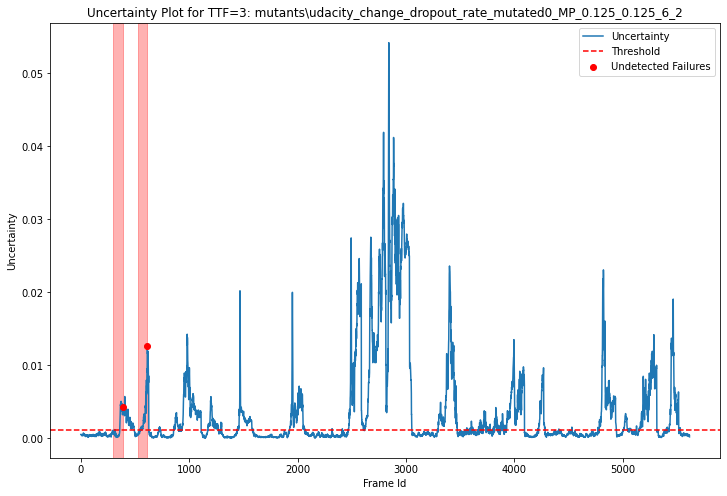

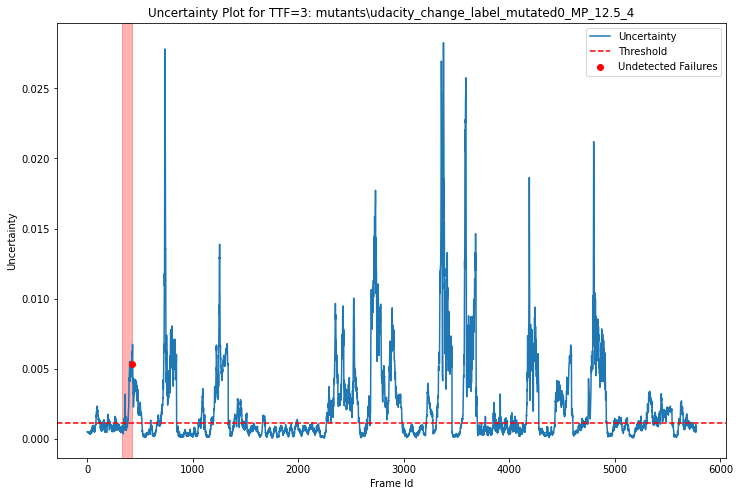

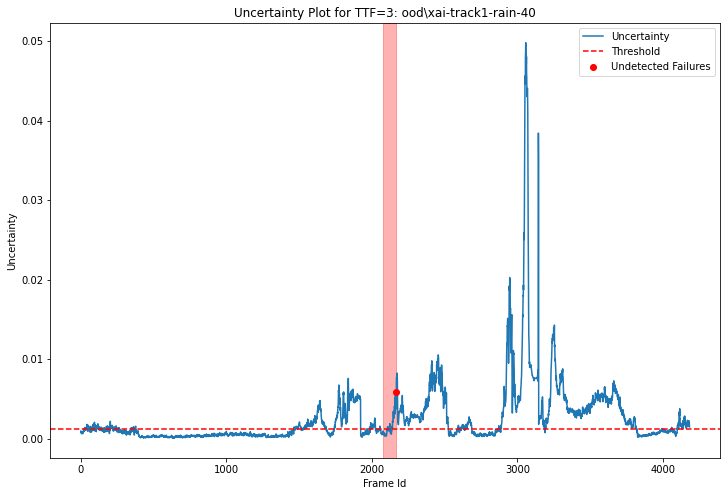

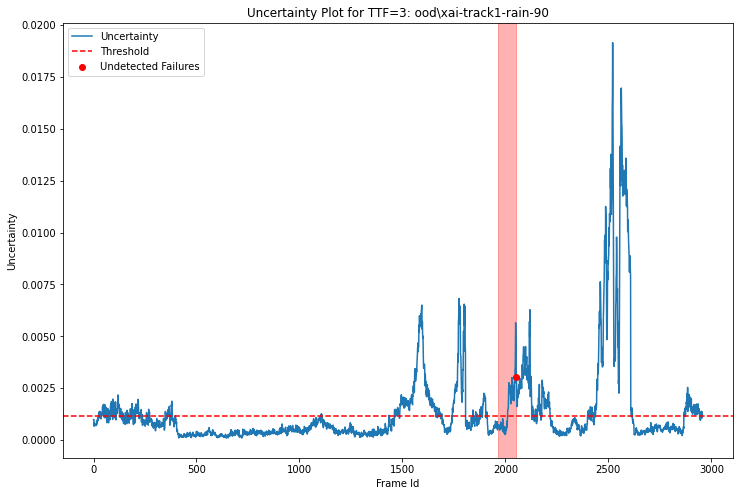

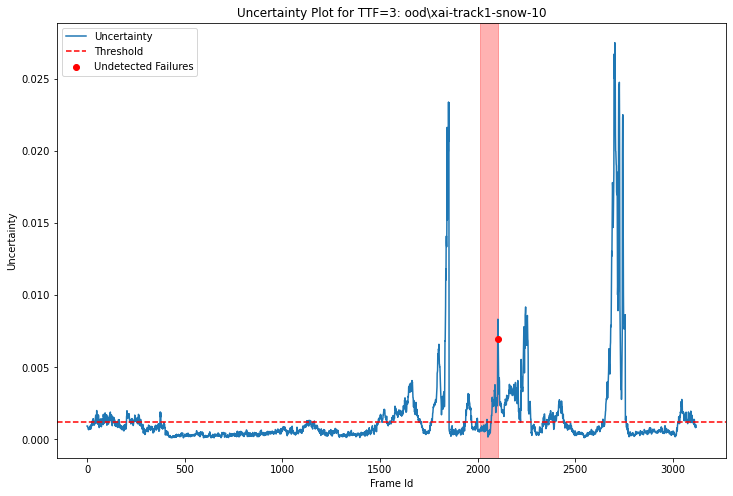

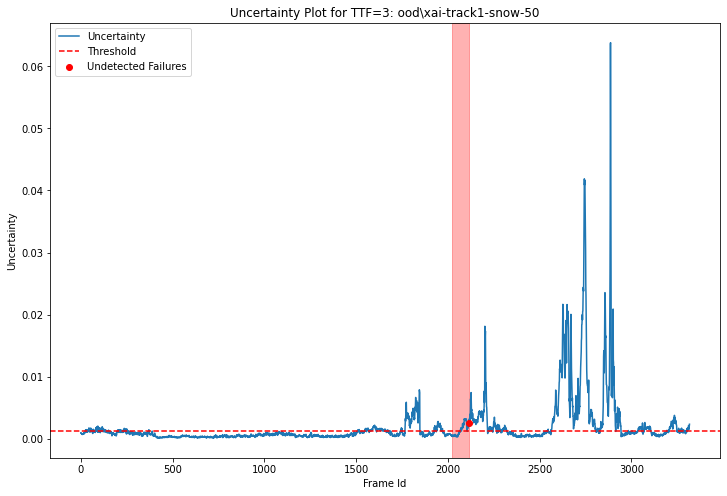

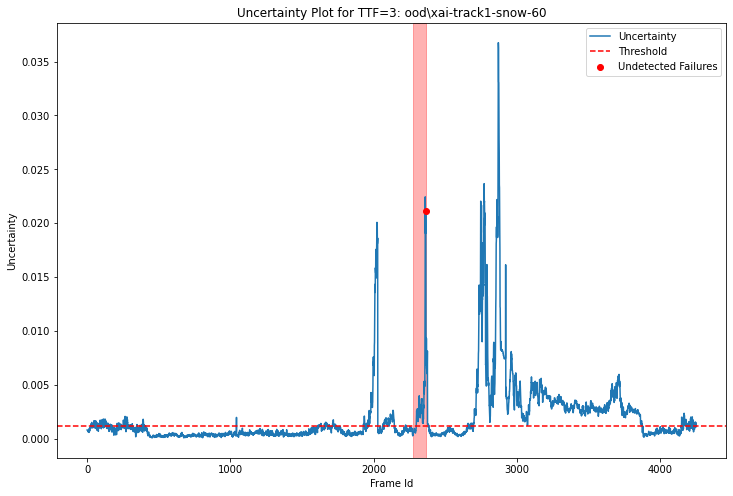

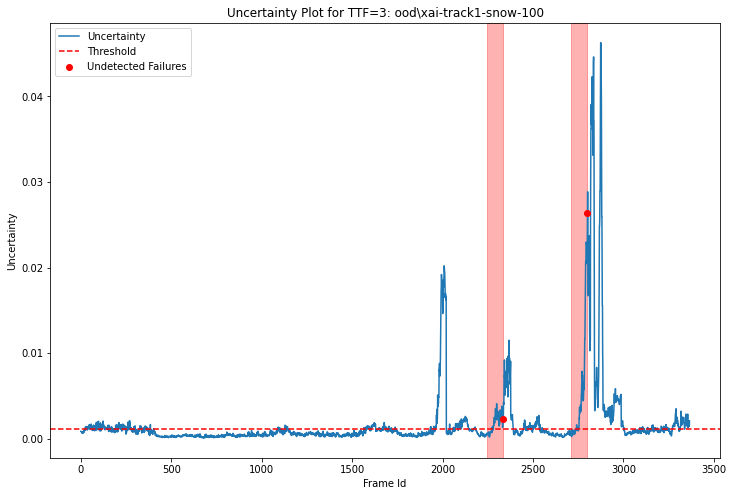

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Iterate through unique simulations
for simulation_name in df_failures_3['simulation_name'].unique():
    # Filter rows for the current simulation
    simulation_rows = df_failures_3[df_failures_3['simulation_name'] == simulation_name]

    # Load uncertainties from the CSV file
    uncertainties_path = f'plots/uncertainty/DE/{simulation_name}/DE_top_15.csv'
    uncertainties_df = pd.read_csv(uncertainties_path)

    # Plot uncertainties
    plt.figure(figsize=(12, 8))
    plt.plot(uncertainties_df['0'], label='Uncertainty')

    # Plot the threshold line
    threshold = simulation_rows['threshold'].iloc[0]  # threshold is the same for all failures
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

    # Add labels and title
    plt.xlabel('Frame Id')
    plt.ylabel('Uncertainty')
    plt.title(f'Uncertainty Plot for TTF=3: {simulation_name}')

    for undetected_failure_id in simulation_rows['undetected_failure_id']:
            # Get the range of 120 frames before the failure
            range_start = max(0, undetected_failure_id - 90)  # Ensure it doesn't go below 0

            # Mark the range with vertical bars in red
            plt.axvspan(range_start, undetected_failure_id, color='red', alpha=0.3)
    
    
    # Add positions of undetected failures
    undetected_failure_positions = uncertainties_df.loc[simulation_rows['undetected_failure_id']]
    plt.scatter(undetected_failure_positions.index, undetected_failure_positions, color='r',label='Undetected Failures', zorder=3)


    plt.legend()

    # Save or display the plot
    plt.savefig(f'qualitative_analysis/{simulation_name}_ttf3.png', transparent=False)
